In [1]:
%matplotlib inline

import json
import numpy as np
import matplotlib.pyplot as plt
import os

from helper import *

In [2]:
baseline = []
select = []
select2 = []
distribution = []
boundary_shear = []
# non_slip = []

for filename in os.listdir("comparison_concave/baseline"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/baseline/"+filename, 'r') as f:
        dic = json.load(f)
    baseline.append(dic['mean separation after push'] - dic['mean separation before push'])

for filename in os.listdir("comparison_concave/selected"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/selected/"+filename, 'r') as f:
        dic = json.load(f)
    select.append(dic['mean separation after push'] - dic['mean separation before push'])

for filename in os.listdir("comparison_concave/selected2"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/selected2/"+filename, 'r') as f:
        dic = json.load(f)
    select2.append(dic['mean separation after push'] - dic['mean separation before push'])

for filename in os.listdir("comparison_concave/distribution"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/distribution/"+filename, 'r') as f:
        dic = json.load(f)
#     if dic['first contact object'] != -1:
#         non_slip.append(dic['mean separation after push'] - dic['mean separation before push'])
    distribution.append(dic['mean separation after push'] - dic['mean separation before push'])

for filename in os.listdir("comparison_concave/boundary_shear"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/boundary_shear/"+filename, 'r') as f:
        dic = json.load(f)
    boundary_shear.append(dic['mean separation after push'] - dic['mean separation before push'])

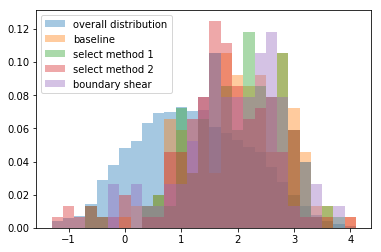

In [3]:
weights = np.ones_like(distribution)/float(len(distribution))
plt.hist(distribution, weights=weights, bins=np.arange(-1.3, 4.3, 0.2), alpha=0.4, label="overall distribution")
weights2 = np.ones_like(baseline)/float(len(baseline))
plt.hist(baseline, weights=weights2, bins=np.arange(-1.3, 4.3, 0.2), alpha=0.4, label="baseline")
weights3 = np.ones_like(select)/float(len(select))
plt.hist(select, weights=weights3, bins=np.arange(-1.3, 4.3, 0.2), alpha=0.4, label="select method 1")
weights4 = np.ones_like(select2)/float(len(select2))
plt.hist(select2, weights=weights4, bins=np.arange(-1.3, 4.3, 0.2), alpha=0.4, label="select method 2")
weights1 = np.ones_like(boundary_shear)/float(len(boundary_shear))
plt.hist(boundary_shear, weights=weights1, bins=np.arange(-1.3, 4.3, 0.2), alpha=0.4, label="boundary shear")
plt.legend(loc='upper left')

<BarContainer object of 5 artists>

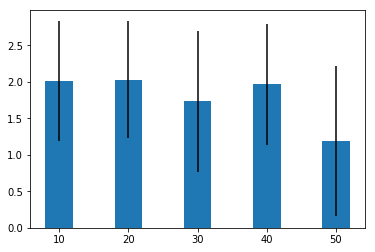

In [4]:
means = (np.mean(baseline), np.mean(select), np.mean(select2), np.mean(boundary_shear), np.mean(distribution))
std = (np.std(baseline), np.std(select), np.std(select2), np.std(boundary_shear), np.std(distribution))

plt.bar((10, 20, 30, 40, 50), means, yerr=std, width=4)

In [5]:
baseline_best = {}
for filename in os.listdir("comparison_concave/baseline"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/baseline/"+filename, 'r') as f:
        dic = json.load(f)
    push_object = -1
    max_dist = 0
    for obj_ind in range(2):
        for obj_ind_2 in range(1, 3):
            if euclidean_dist(dic[str(obj_ind)+" original pos"], dic[str(obj_ind_2)+" original pos"]) > max_dist:
                max_dist = euclidean_dist(dic[str(obj_ind)+" original pos"], dic[str(obj_ind_2)+" original pos"])
                push_object = 3 - obj_ind - obj_ind_2
    if push_object == -1 or push_object != dic["first contact object"]:
        continue
    key = filename.split("_")[0]
    if not key in baseline_best.keys():
        baseline_best[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]
    elif baseline_best[key][0] < dic[str(push_object)+" change of pos"]:
        baseline_best[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]

        
baseline_final = [baseline_best[key][1] for key in baseline_best.keys()]

In [6]:
selected_best = {}
for filename in os.listdir("comparison_concave/selected"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/selected/"+filename, 'r') as f:
        dic = json.load(f)
    push_object = -1
    max_dist = 0
    for obj_ind in range(2):
        for obj_ind_2 in range(1, 3):
            if euclidean_dist(dic[str(obj_ind)+" original pos"], dic[str(obj_ind_2)+" original pos"]) > max_dist:
                max_dist = euclidean_dist(dic[str(obj_ind)+" original pos"], dic[str(obj_ind_2)+" original pos"])
                push_object = 3 - obj_ind - obj_ind_2
    if push_object == -1 or push_object != dic["first contact object"]:
        continue
    key = filename.split("_")[0]
    if not key in selected_best.keys():
        selected_best[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]
    elif selected_best[key][0] < dic[str(push_object)+" change of pos"]:
        selected_best[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]

        
selected_final = [selected_best[key][1] for key in selected_best.keys()]

In [7]:
selected2_best = {}
for filename in os.listdir("comparison_concave/selected2"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/selected2/"+filename, 'r') as f:
        dic = json.load(f)
    push_object = -1
    max_dist = 0
    for obj_ind in range(2):
        for obj_ind_2 in range(1, 3):
            if euclidean_dist(dic[str(obj_ind)+" original pos"], dic[str(obj_ind_2)+" original pos"]) > max_dist:
                max_dist = euclidean_dist(dic[str(obj_ind)+" original pos"], dic[str(obj_ind_2)+" original pos"])
                push_object = 3 - obj_ind - obj_ind_2
    if push_object == -1 or push_object != dic["first contact object"]:
        continue
    key = filename.split("_")[0]
    if not key in selected2_best.keys():
        selected2_best[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]
    elif selected2_best[key][0] < dic[str(push_object)+" change of pos"]:
        selected2_best[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]

        
selected2_final = [selected2_best[key][1] for key in selected2_best.keys()]

In [8]:
boundary_shear_all = {}
for filename in os.listdir("comparison_concave/boundary_shear"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/boundary_shear/"+filename, 'r') as f:
        dic = json.load(f)
    key = filename.split("_")[0]
    if not key in boundary_shear_all.keys():
        boundary_shear_all[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]
    elif boundary_shear_all[key][0] < dic[str(push_object)+" change of pos"]:
        boundary_shear_all[key] = [dic[str(push_object)+" change of pos"], dic['mean separation after push'] - dic['mean separation before push'], filename]



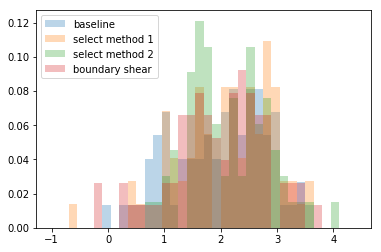

In [40]:
weights2 = np.ones_like(baseline_final)/float(len(baseline_final))
plt.hist(baseline_final, weights=weights2, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="baseline")
weights3 = np.ones_like(selected_final)/float(len(selected_final))
plt.hist(selected_final, weights=weights3, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="select method 1")
weights4 = np.ones_like(selected2_final)/float(len(selected2_final))
plt.hist(selected2_final, weights=weights4, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="select method 2")
weights5 = np.ones_like(boundary_shear)/float(len(boundary_shear))
plt.hist(boundary_shear, weights=weights5, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="boundary shear")
plt.legend(loc='upper left')

<BarContainer object of 5 artists>

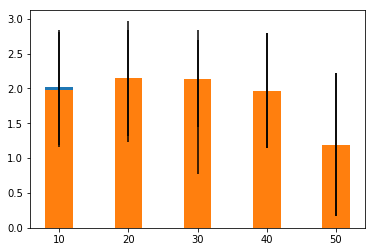

In [10]:
plt.bar((10, 20, 30, 40, 50), means, yerr=std, width=4)
means = (np.mean(baseline_final), np.mean(selected_final), np.mean(selected2_final), np.mean(boundary_shear), np.mean(distribution))
std = (np.std(baseline_final), np.std(selected_final), np.std(selected2_final), np.std(boundary_shear), np.std(distribution))

plt.bar((10, 20, 30, 40, 50), means, yerr=std, width=4)

In [11]:
overall = {}

for key in baseline_best.keys():
    if not key in overall.keys():
        overall[key] = baseline_best[key]
    elif overall[key][1] < baseline_best[key][1]:
        overall[key] = baseline_best[key]
        
for key in selected_best.keys():
    if not key in overall.keys():
        overall[key] = selected_best[key]
    elif overall[key][1] < selected_best[key][1]:
        overall[key] = selected_best[key]
        
for key in selected2_best.keys():
    if not key in overall.keys():
        overall[key] = selected2_best[key]
    elif overall[key][1] < selected2_best[key][1]:
        overall[key] = selected2_best[key]

for key in boundary_shear_all.keys():
    if not key in overall.keys():
        overall[key] = boundary_shear_all[key]
    elif overall[key][1] < boundary_shear_all[key][1]:
        overall[key] = boundary_shear_all[key]

overall_final = [overall[key][1] for key in overall.keys()]

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01315789,  0.05263158,  0.02631579,  0.        ,  0.01315789,
         0.05263158,  0.02631579,  0.05263158,  0.05263158,  0.03947368,
         0.06578947,  0.07894737,  0.05263158,  0.14473684,  0.09210526,
         0.07894737,  0.02631579,  0.05263158,  0.01315789,  0.02631579]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5]),
 <a list of 35 Patch objects>)

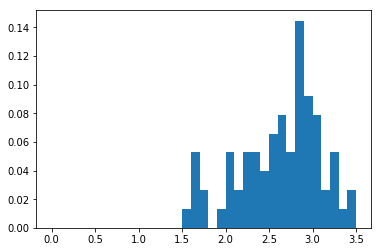

In [12]:
weights5 = np.ones_like(overall_final)/float(len(overall_final))
plt.hist(overall_final, weights=weights5, bins=np.arange(0.0, 3.6, 0.1), label="overall best")

In [13]:
optimal = {}
for filename in os.listdir("comparison_concave/distribution"):
    if len(filename.split("."))!=2 or filename.split(".")[1]!="json":
        continue
    with open("comparison_concave/distribution/"+filename, 'r') as f:
        dic = json.load(f)
    key = filename.split("_")[0]
    if not key in optimal.keys():
        optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]
    elif optimal[key][0] < dic['mean separation after push'] - dic['mean separation before push']:
        optimal[key] = [dic['mean separation after push'] - dic['mean separation before push'], filename]

In [14]:
optimal_final = [optimal[key][0] for key in optimal.keys()]

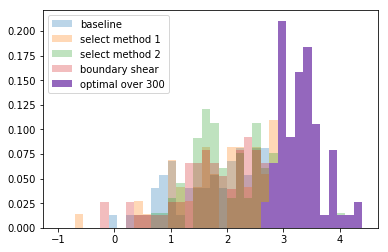

In [42]:
weights2 = np.ones_like(baseline_final)/float(len(baseline_final))
plt.hist(baseline_final, weights=weights2, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="baseline")
weights3 = np.ones_like(selected_final)/float(len(selected_final))
plt.hist(selected_final, weights=weights3, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="select method 1")
weights4 = np.ones_like(selected2_final)/float(len(selected2_final))
plt.hist(selected2_final, weights=weights4, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="select method 2")
weights5 = np.ones_like(boundary_shear)/float(len(boundary_shear))
plt.hist(boundary_shear, weights=weights5, bins=np.arange(-1, 4.5, 0.15), alpha=0.3, label="boundary shear")
weights6 = np.ones_like(optimal_final)/float(len(optimal_final))
plt.hist(optimal_final, weights=weights6, bins=np.arange(-1, 4.5, 0.15), alpha=1, label="optimal over 300")
plt.legend(loc='upper left')

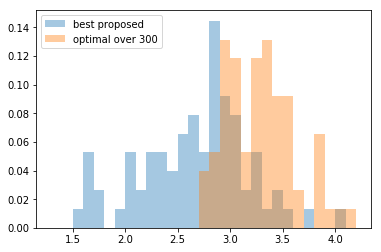

In [45]:
weights5 = np.ones_like(overall_final)/float(len(overall_final))
plt.hist(overall_final, weights=weights5, bins=np.arange(1.3, 4.3, 0.1), alpha=0.4, label="best proposed")
weights6 = np.ones_like(optimal_final)/float(len(optimal_final))
plt.hist(optimal_final, weights=weights6, bins=np.arange(1.3, 4.3, 0.1), alpha=0.4, label="optimal over 300")
plt.legend(loc='upper left')

In [18]:
a = {}
for key in optimal.keys():
    slips = []
    if key in selected_best.keys():
        slips.append(selected_best[key][1])
    if key in selected2_best.keys():
        slips.append(selected2_best[key][1])
    if key in baseline_best.keys():
        slips.append(baseline_best[key][1])
    if len(slips) != 0:
        optimal_slip = max(slips)
        a[key] = (optimal_slip / optimal[key][0])

In [19]:
slip_env = [a[key] for key in a.keys()]

(array([ 0.01315789,  0.        ,  0.01315789,  0.        ,  0.03947368,
         0.        ,  0.        ,  0.06578947,  0.02631579,  0.01315789,
         0.01315789,  0.05263158,  0.09210526,  0.01315789,  0.03947368,
         0.03947368,  0.06578947,  0.06578947,  0.09210526,  0.07894737,
         0.06578947,  0.07894737,  0.05263158,  0.06578947,  0.01315789,  0.        ]),
 array([ 0.3 ,  0.33,  0.36,  0.39,  0.42,  0.45,  0.48,  0.51,  0.54,
         0.57,  0.6 ,  0.63,  0.66,  0.69,  0.72,  0.75,  0.78,  0.81,
         0.84,  0.87,  0.9 ,  0.93,  0.96,  0.99,  1.02,  1.05,  1.08]),
 <a list of 26 Patch objects>)

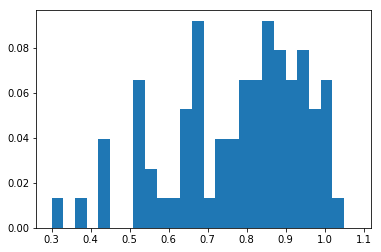

In [22]:
weights6 = np.ones_like(slip_env)/float(len(slip_env))
plt.hist(slip_env, weights=weights6, bins=np.arange(0.3, 1.1, 0.03), alpha=1, label="optimal over 300")

In [23]:
b = {}
for key in optimal.keys():
    if key in boundary_shear_all.keys():
        mean_sep = boundary_shear_all[key][1]
        b[key] = (mean_sep / optimal[key][0])

(array([ 0.        ,  0.01315789,  0.01315789,  0.        ,  0.        ,
         0.        ,  0.02631579,  0.02631579,  0.03947368,  0.03947368,
         0.03947368,  0.02631579,  0.03947368,  0.07894737,  0.02631579,
         0.02631579,  0.02631579,  0.05263158,  0.06578947,  0.03947368,
         0.01315789,  0.05263158,  0.01315789,  0.06578947,  0.10526316,
         0.06578947,  0.02631579,  0.        ,  0.01315789,  0.01315789,
         0.        ,  0.        ,  0.        ]),
 array([ 0.1 ,  0.13,  0.16,  0.19,  0.22,  0.25,  0.28,  0.31,  0.34,
         0.37,  0.4 ,  0.43,  0.46,  0.49,  0.52,  0.55,  0.58,  0.61,
         0.64,  0.67,  0.7 ,  0.73,  0.76,  0.79,  0.82,  0.85,  0.88,
         0.91,  0.94,  0.97,  1.  ,  1.03,  1.06,  1.09]),
 <a list of 33 Patch objects>)

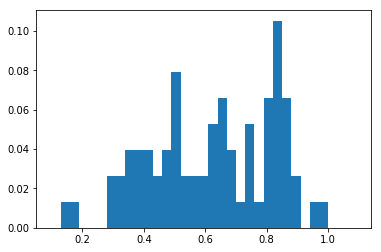

In [25]:
single_sep_env = [b[key] for key in b.keys()]
weights6 = np.ones_like(single_sep_env)/float(len(single_sep_env))
plt.hist(single_sep_env, weights=weights6, bins=np.arange(0.1, 1.1, 0.03), alpha=1, label="optimal over 300")

In [26]:
overall_ratio = {}
for key in optimal.keys():
    optimal_ratio = 0
    if key in a.keys():
        optimal_ratio = a[key]
    if key in b.keys():
        optimal_ratio = max(optimal_ratio, b[key])
    overall_ratio[key] = optimal_ratio

(array([ 0.        ,  0.01315789,  0.        ,  0.02631579,  0.03947368,
         0.02631579,  0.        ,  0.03947368,  0.05263158,  0.05263158,
         0.02631579,  0.06578947,  0.05263158,  0.03947368,  0.14473684,
         0.09210526,  0.06578947,  0.06578947,  0.07894737,  0.06578947,
         0.05263158,  0.        ,  0.        ]),
 array([ 0.4 ,  0.43,  0.46,  0.49,  0.52,  0.55,  0.58,  0.61,  0.64,
         0.67,  0.7 ,  0.73,  0.76,  0.79,  0.82,  0.85,  0.88,  0.91,
         0.94,  0.97,  1.  ,  1.03,  1.06,  1.09]),
 <a list of 23 Patch objects>)

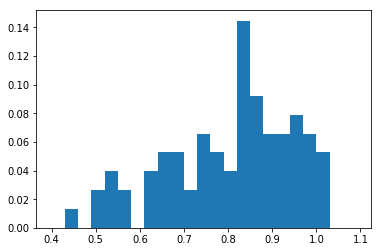

In [29]:
overall_ratio_distri = [overall_ratio[key] for key in overall_ratio.keys()]
weights7 = np.ones_like(overall_ratio_distri)/float(len(overall_ratio_distri))
plt.hist(overall_ratio_distri, weights=weights7, bins=np.arange(0.4, 1.1, 0.03), alpha=1, label="optimal over 300")

In [31]:
for key in overall_ratio.keys():
    if overall_ratio[key] < 0.5:
        print(key)

71


In [32]:
slip_better_then_declutter = {}
slip_worse_then_declutter = {}
for key in optimal.keys():
    if key in a.keys() and key in b.keys():
        if a[key] > b[key]:
            slip_better_then_declutter[key] = a[key] - b[key]
        else:
            slip_worse_then_declutter[key] = b[key] - a[key]

In [35]:
for key in slip_better_then_declutter.keys():
    if slip_better_then_declutter[key] > 0.8:
        print(key)

79


In [38]:
for key in slip_worse_then_declutter.keys():
    if slip_worse_then_declutter[key] > 0.4:
        print(key)

74
93
